In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load the matches dataset
matches_df = pd.read_csv("C:/Users/karth/Downloads/matchesS.csv")
deliveries_df = pd.read_csv("C:/Users/karth/Downloads/Team comparision/deliveries.csv")

# Display the first few rows
matches_df.head()


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,18-04-2008,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,19-04-2008,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,19-04-2008,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,20-04-2008,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,20-04-2008,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [7]:
matches_df.isnull().sum()

id                    0
season                0
city                  0
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                0
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [9]:
# Fill missing values for numerical columns with 0
matches_df['result_margin'] = matches_df['result_margin'].fillna(0)

# Drop rows where essential fields are missing
matches_df = matches_df.dropna(subset=['winner'])

# Verify missing values are handled
matches_df.isnull().sum()


id                    0
season                0
city                  0
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                0
result                0
result_margin         0
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [11]:
# Count total matches played by each team
matches_played = matches_df['team1'].value_counts() + matches_df['team2'].value_counts()

# Count total matches won by each team
matches_won = matches_df['winner'].value_counts()

# Calculate win percentage
win_percentage = (matches_won / matches_played) * 100
win_percentage = win_percentage.dropna().sort_values(ascending=False)

# Display the win percentage
win_percentage


Chennai Super Kings            58.403361
Mumbai Indians                 55.172414
Gujarat Lions                  54.666667
Lucknow Super Giants           54.545455
Kolkata Knight Riders          52.191235
Rajasthan Royals               51.131222
Rising Pune Supergiants        50.000000
Royal Challengers Bangalore    48.627451
Delhi Capitals                 46.031746
Punjab Kings                   45.528455
Sunrisers Hyderabad            45.525292
Kochi Tuskers Kerala           42.857143
Pune Warriors                  28.260870
Name: count, dtype: float64

<Figure size 1200x600 with 0 Axes>

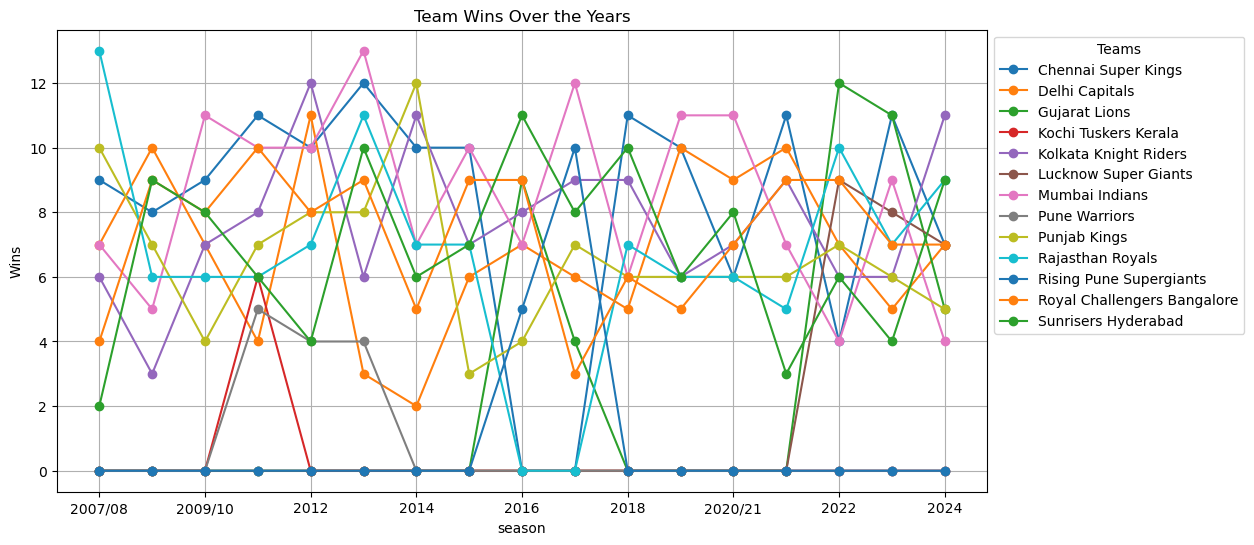

In [13]:
# Group by season and winning team to count wins per season
seasonal_wins = matches_df.groupby(['season', 'winner']).size().unstack(fill_value=0)
# Plot the line chart
plt.figure(figsize=(12, 6))
seasonal_wins.plot(kind='line', marker='o', figsize=(12, 6))
plt.title("Team Wins Over the Years")
plt.xlabel("season")
plt.ylabel("Wins")
plt.legend(title="Teams", bbox_to_anchor=(1,1))
plt.grid(True)
plt.show()


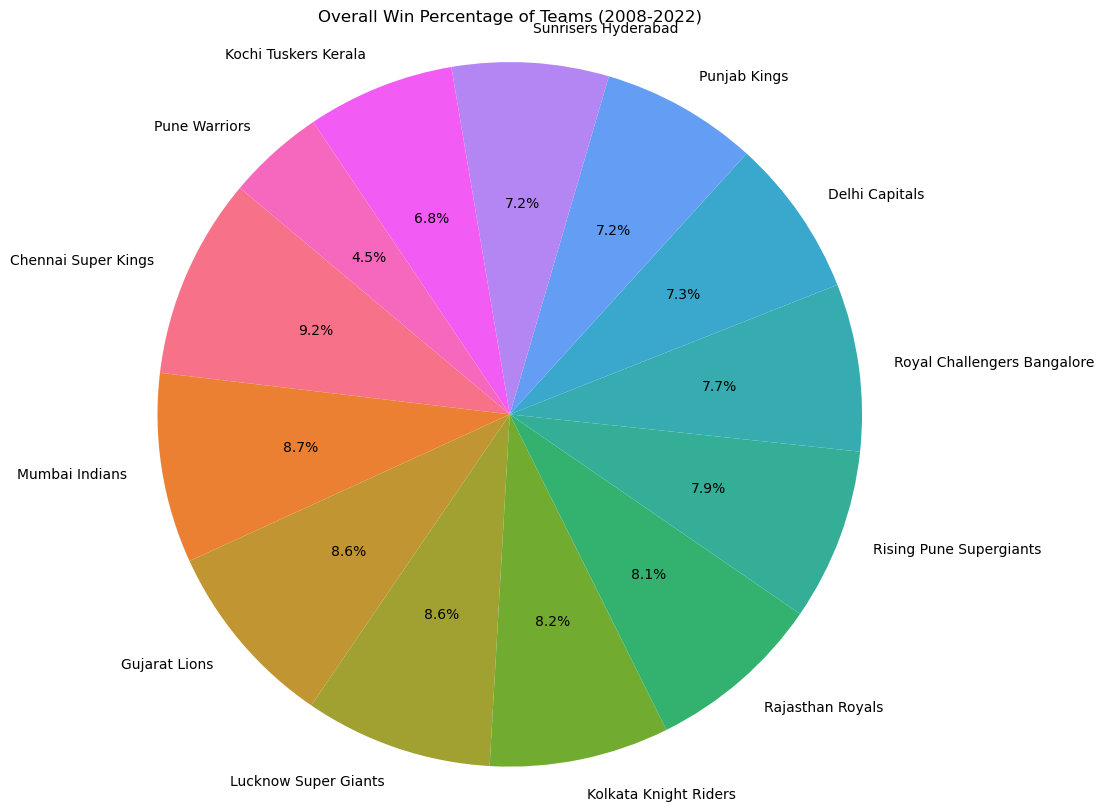

In [15]:
# Plot the pie chart
plt.figure(figsize=(10, 10))
plt.pie(win_percentage, labels=win_percentage.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("husl", len(win_percentage)))
plt.title("Overall Win Percentage of Teams (2008-2022)")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [17]:
deliveries_df = pd.read_csv("C:/Users/karth/Downloads/Team comparision/deliveries.csv")


Top 10 rows of matches_played:       season                         team  matches_played
0    2007/08          Chennai Super Kings              16
1    2007/08               Delhi Capitals              14
2    2007/08        Kolkata Knight Riders              13
3    2007/08               Mumbai Indians              14
4    2007/08                 Punjab Kings              15
..       ...                          ...             ...
141     2024               Mumbai Indians              14
142     2024                 Punjab Kings              14
143     2024             Rajasthan Royals              15
144     2024  Royal Challengers Bangalore              15
145     2024          Sunrisers Hyderabad              16

[146 rows x 3 columns]
Top 10 rows of win_percentage:       season                       winner  wins                         team  \
0    2007/08          Chennai Super Kings     9          Chennai Super Kings   
1    2007/08               Delhi Capitals     7           

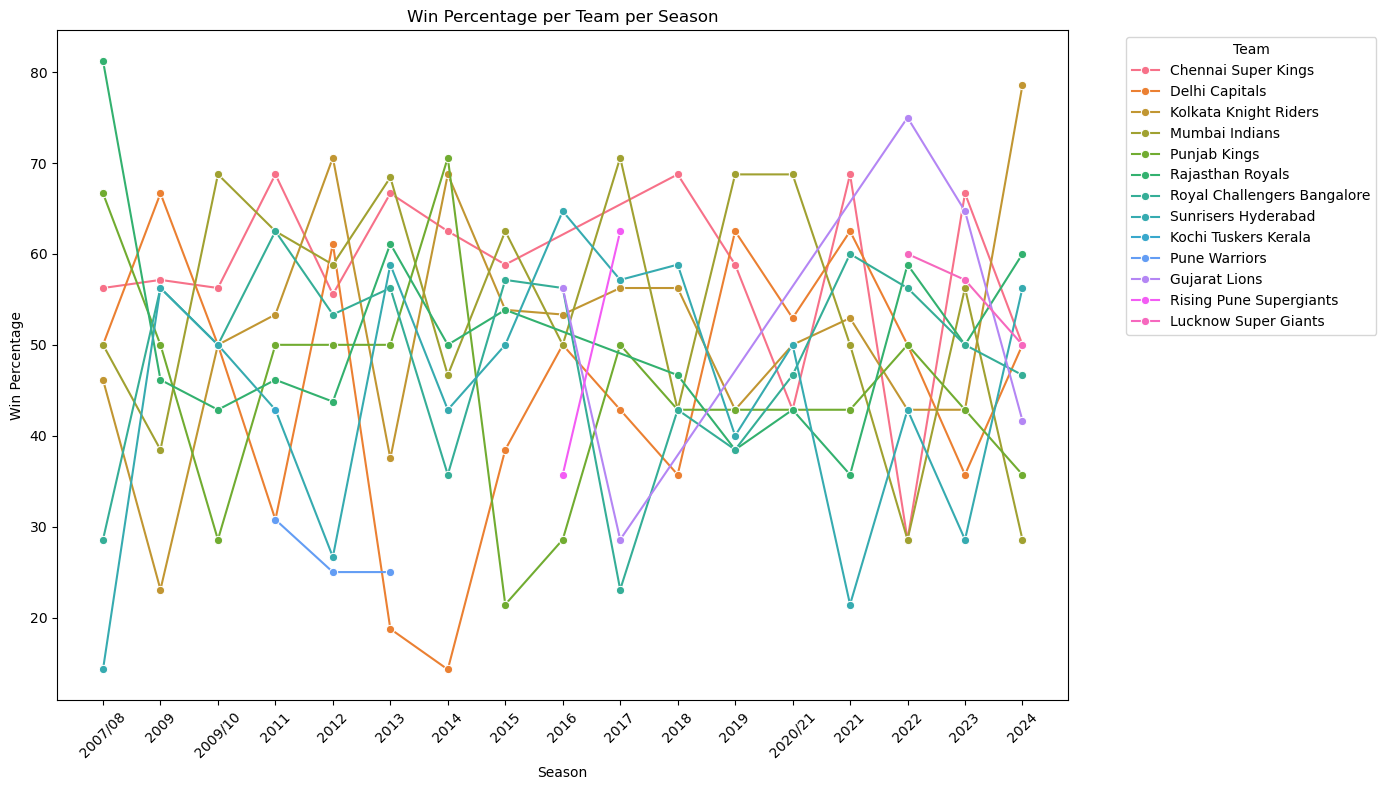

Top 10 rows of player_performance:   player_of_match   season                       winner  matches_played
0      A Chandila     2012             Rajasthan Royals               1
1        A Kumble  2007/08  Royal Challengers Bangalore               1
2        A Kumble     2009          Sunrisers Hyderabad               1
3        A Kumble  2009/10  Royal Challengers Bangalore               1
4       A Manohar     2023                Gujarat Lions               1
5        A Mishra  2007/08               Delhi Capitals               1
6        A Mishra     2009               Delhi Capitals               1
7        A Mishra     2011          Sunrisers Hyderabad               2
8        A Mishra     2013          Sunrisers Hyderabad               4
9        A Mishra     2016               Delhi Capitals               1
Top 10 key players: ['RG Sharma', 'MS Dhoni', 'AB de Villiers', 'V Kohli', 'SK Raina', 'DA Warner', 'RA Jadeja', 'S Dhawan', 'SR Watson', 'YK Pathan']
Top 10 rows of key_pla

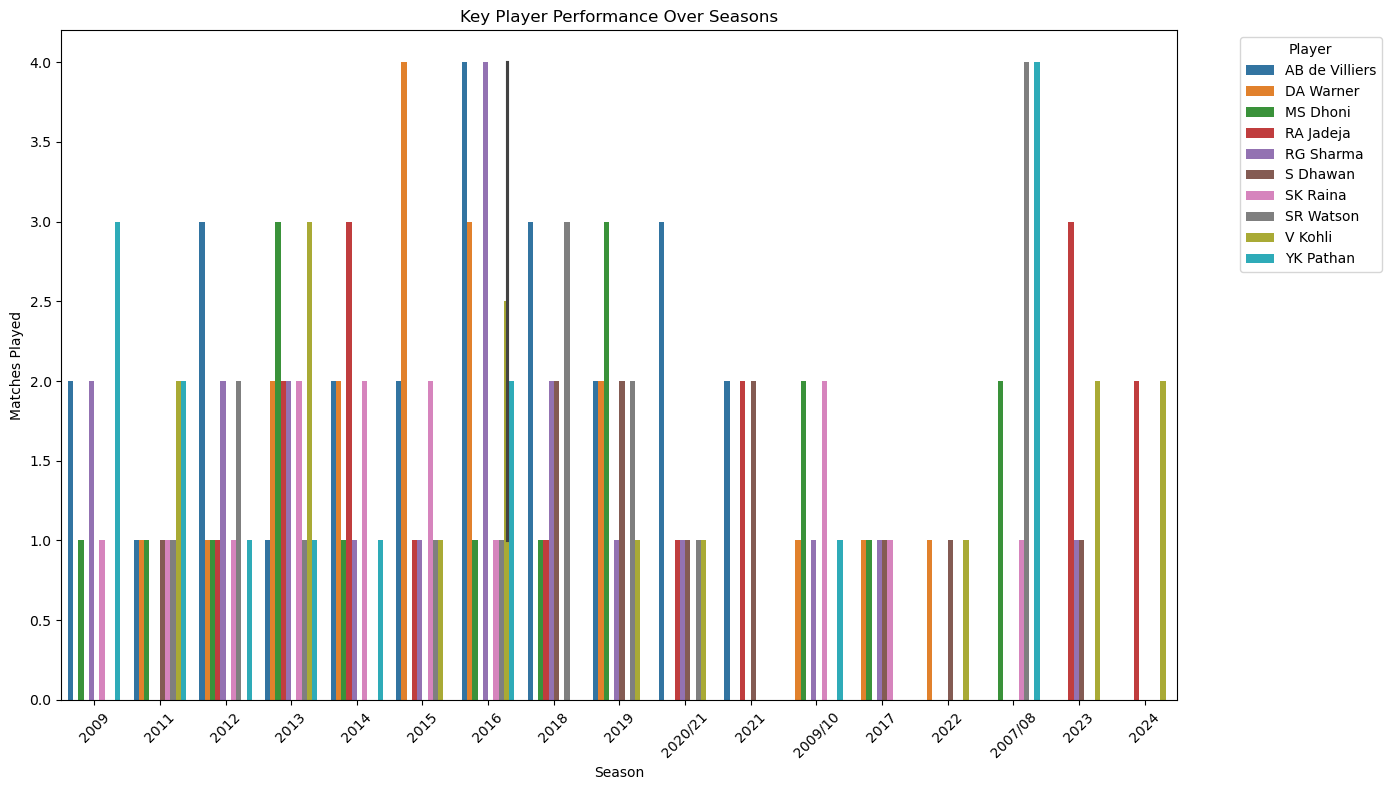

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
matches_df = pd.read_csv("C:/Users/karth/Downloads/matchesS.csv")

# Extract relevant columns from matches_df
matches_df = matches_df[['season', 'team1', 'team2', 'winner', 'player_of_match']]

# Handle missing values
matches_df = matches_df.dropna(subset=['winner', 'player_of_match'])

# Calculate wins per team per season
wins_per_season = matches_df.groupby(['season', 'winner']).size().reset_index(name='wins')

# Calculate total matches played by each team per season
matches_played = pd.melt(matches_df, id_vars=['season'], value_vars=['team1', 'team2'], var_name='team_type', value_name='team')
matches_played = matches_played.groupby(['season', 'team']).size().reset_index(name='matches_played')
print("Top 10 rows of matches_played:",matches_played)


# Calculate win percentage per team per season
win_percentage = pd.merge(wins_per_season, matches_played, left_on=['season', 'winner'], right_on=['season', 'team'])
win_percentage['win_percentage'] = (win_percentage['wins'] / win_percentage['matches_played']) * 100

print("Top 10 rows of win_percentage:",win_percentage)

# Plot win percentage per team per season using line chart
plt.figure(figsize=(14, 8))
sns.lineplot(x='season', y='win_percentage', hue='winner', data=win_percentage, marker='o')
plt.title('Win Percentage per Team per Season')
plt.xlabel('Season')
plt.ylabel('Win Percentage')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate player performance per season
player_performance = matches_df.groupby(['player_of_match', 'season', 'winner']).size().reset_index(name='matches_played')
print("Top 10 rows of player_performance:",player_performance.head(10))

# Identify key players (e.g., players with the most player of the match awards)
key_players = player_performance['player_of_match'].value_counts().head(10).index.tolist()

print("Top 10 key players:",key_players)

# Filter player performance for key players
key_player_performance = player_performance[player_performance['player_of_match'].isin(key_players)]

print("Top 10 rows of key_player_performance:",key_player_performance.head(10))

# Plot key player performance over seasons
plt.figure(figsize=(14, 8))
sns.barplot(x='season', y='matches_played', hue='player_of_match', data=key_player_performance)
plt.title('Key Player Performance Over Seasons')
plt.xlabel('Season')
plt.ylabel('Matches Played')
plt.legend(title='Player', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
key_player_performance.to_csv("C:/Users/karth/Downloads/Team comparision/key_player_performance.csv", index=False)
win_percentage.to_csv("C:/Users/karth/Downloads/Team comparision/win_percentage.csv", index=False)
matches_played.to_csv("C:/Users/karth/Downloads/Team comparision/matches_played.csv", index=False)


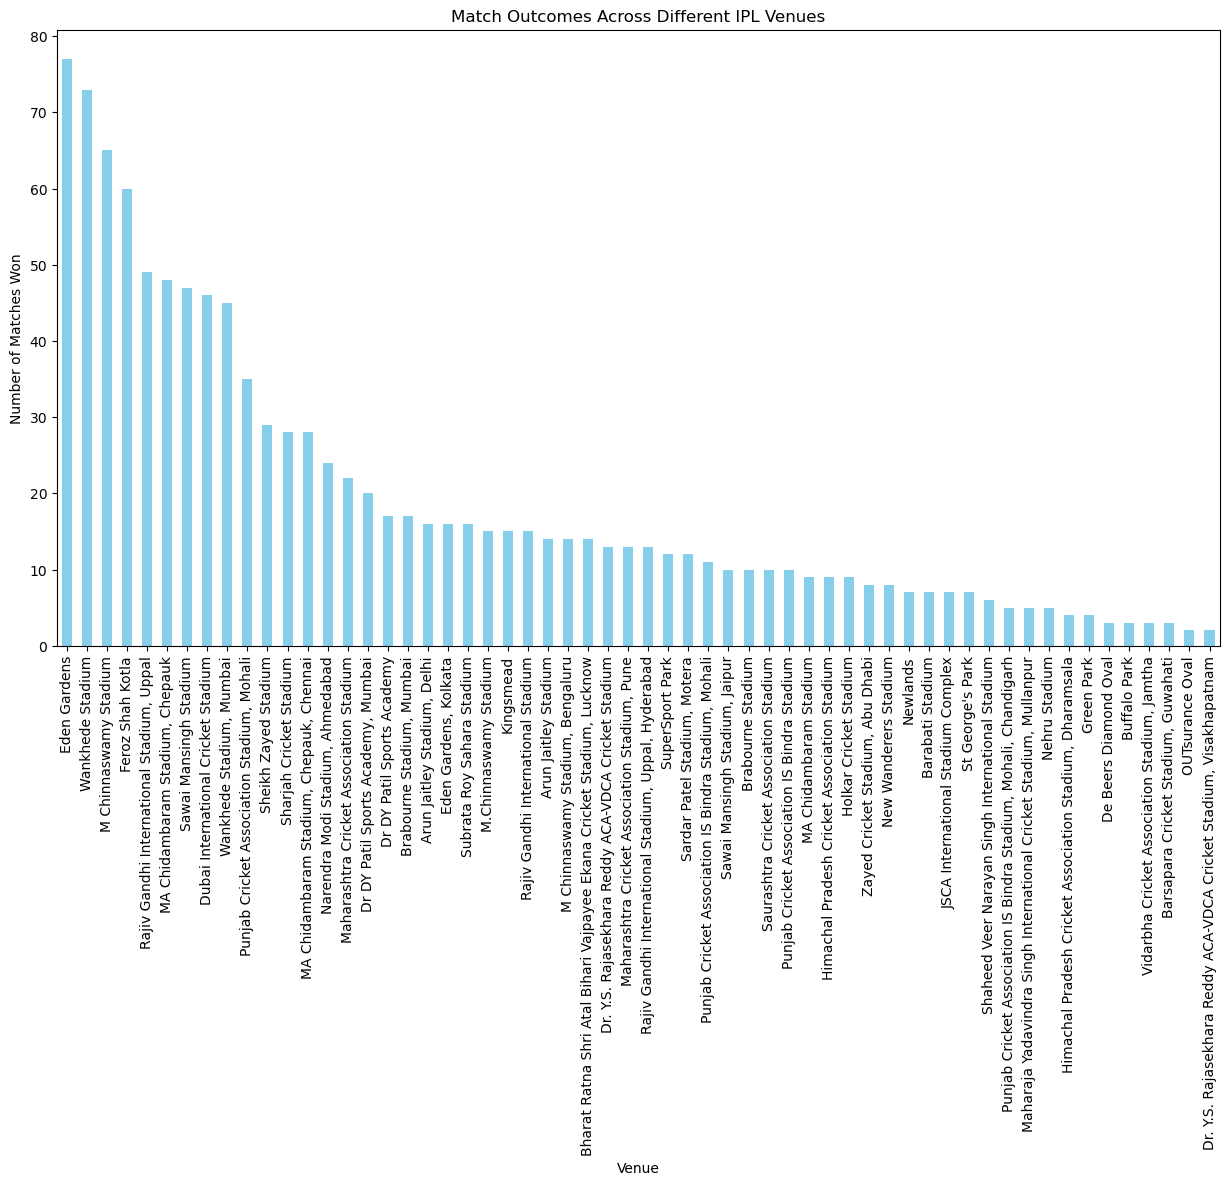

In [133]:
#4th features bar chart

# Count the number of matches won at each venue
venue_performance = matches_df.groupby("venue")["winner"].value_counts().unstack().fillna(0)

# Plot venue-based performance using a bar chart
plt.figure(figsize=(15, 8))
venue_performance.sum(axis=1).sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Match Outcomes Across Different IPL Venues")
plt.xlabel("Venue")
plt.ylabel("Number of Matches Won")
plt.xticks(rotation=90)
plt.show()
